In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
pd.options.display.max_rows = 2000
pd.options.display.max_columns = 150

In [3]:
disease = pd.read_csv("Data/Disease Dataset.csv",index_col=False)

In [4]:
disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


In [5]:
disease.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [6]:
#Phantom column at 133 exists
disease.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis',
       'Unnamed: 133'],
      dtype='object', length=134)

In [7]:
disease.shape

(4920, 134)

In [8]:
#no missing values except for column #133
disease.isnull().sum()

itching                              0
skin_rash                            0
nodal_skin_eruptions                 0
continuous_sneezing                  0
shivering                            0
chills                               0
joint_pain                           0
stomach_pain                         0
acidity                              0
ulcers_on_tongue                     0
muscle_wasting                       0
vomiting                             0
burning_micturition                  0
spotting_ urination                  0
fatigue                              0
weight_gain                          0
anxiety                              0
cold_hands_and_feets                 0
mood_swings                          0
weight_loss                          0
restlessness                         0
lethargy                             0
patches_in_throat                    0
irregular_sugar_level                0
cough                                0
high_fever               

In [9]:
disease.sum()

itching                                                                         678
skin_rash                                                                       786
nodal_skin_eruptions                                                            108
continuous_sneezing                                                             222
shivering                                                                       108
chills                                                                          798
joint_pain                                                                      684
stomach_pain                                                                    222
acidity                                                                         222
ulcers_on_tongue                                                                108
muscle_wasting                                                                  108
vomiting                                                                    

In [10]:
disease.isnull().sum() / len(disease.index)

itching                           0.0
skin_rash                         0.0
nodal_skin_eruptions              0.0
continuous_sneezing               0.0
shivering                         0.0
chills                            0.0
joint_pain                        0.0
stomach_pain                      0.0
acidity                           0.0
ulcers_on_tongue                  0.0
muscle_wasting                    0.0
vomiting                          0.0
burning_micturition               0.0
spotting_ urination               0.0
fatigue                           0.0
weight_gain                       0.0
anxiety                           0.0
cold_hands_and_feets              0.0
mood_swings                       0.0
weight_loss                       0.0
restlessness                      0.0
lethargy                          0.0
patches_in_throat                 0.0
irregular_sugar_level             0.0
cough                             0.0
high_fever                        0.0
sunken_eyes 

In [11]:
#drop phantom column 133
disease.dropna(how='all', axis='columns')

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [12]:
#unnamed column still appears
disease.isnull().sum() / len(disease.index)

itching                           0.0
skin_rash                         0.0
nodal_skin_eruptions              0.0
continuous_sneezing               0.0
shivering                         0.0
chills                            0.0
joint_pain                        0.0
stomach_pain                      0.0
acidity                           0.0
ulcers_on_tongue                  0.0
muscle_wasting                    0.0
vomiting                          0.0
burning_micturition               0.0
spotting_ urination               0.0
fatigue                           0.0
weight_gain                       0.0
anxiety                           0.0
cold_hands_and_feets              0.0
mood_swings                       0.0
weight_loss                       0.0
restlessness                      0.0
lethargy                          0.0
patches_in_throat                 0.0
irregular_sugar_level             0.0
cough                             0.0
high_fever                        0.0
sunken_eyes 

In [13]:
#found this solution to rename with dict, then drop
disease.rename({"Unnamed: 133":"a"}, axis="columns", inplace=True)
disease.drop(["a"], axis=1, inplace=True)

In [14]:
#finally gone
disease.isnull().sum() / len(disease.index)

itching                           0.0
skin_rash                         0.0
nodal_skin_eruptions              0.0
continuous_sneezing               0.0
shivering                         0.0
chills                            0.0
joint_pain                        0.0
stomach_pain                      0.0
acidity                           0.0
ulcers_on_tongue                  0.0
muscle_wasting                    0.0
vomiting                          0.0
burning_micturition               0.0
spotting_ urination               0.0
fatigue                           0.0
weight_gain                       0.0
anxiety                           0.0
cold_hands_and_feets              0.0
mood_swings                       0.0
weight_loss                       0.0
restlessness                      0.0
lethargy                          0.0
patches_in_throat                 0.0
irregular_sugar_level             0.0
cough                             0.0
high_fever                        0.0
sunken_eyes 

In [15]:
#drop fluid_overload1
disease = disease.drop(['fluid_overload.1'], axis = 1)

In [16]:
disease.prognosis.value_counts()

Hypertension                               120
Hepatitis B                                120
Pneumonia                                  120
Common Cold                                120
Varicose veins                             120
Jaundice                                   120
Hypoglycemia                               120
Impetigo                                   120
Heart attack                               120
Diabetes                                   120
Alcoholic hepatitis                        120
Fungal infection                           120
Cervical spondylosis                       120
Hyperthyroidism                            120
Typhoid                                    120
(vertigo) Paroymsal  Positional Vertigo    120
Dimorphic hemmorhoids(piles)               120
Tuberculosis                               120
Chronic cholestasis                        120
AIDS                                       120
Paralysis (brain hemorrhage)               120
Malaria      

In [17]:
#copy values of prognosis to new column triage
disease['triage'] = disease['prognosis'].values

In [18]:
disease.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,triage
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,Fungal infection


In [19]:
#map triage categories from prognosis to triage column

#triage category can be changed using the dictionary

#1 Immediate Care
#2 Within a week
#3 Address at next visit
#4 Need more information

disease = disease.replace({'triage': {'Paralysis (brain hemorrhage)':1,'Pneumonia':1,'Bronchial Asthma':1,'Tuberculosis':1,
                            'Typhoid':1, 'Chicken pox':1,'Heart attack':1,'Drug Reaction':1, 'Malaria':1, 'Dengue':1,
                            'Fungal infection': 2,'Hepatitis E':2,'Alcoholic hepatitis':2, 'Hepatitis B':2,'Hepatitis C':2,
                            'hepatitis A':2, 'Urinary tract infection':2, 'AIDS':2,'Allergy':3,'Psoriasis':3,'Acne':3,
                           'Arthritis':3,'(vertigo) Paroymsal  Positional Vertigo':3,'Dimorphic hemmorhoids(piles)':3,
                           'Osteoarthristis':3,'GERD':3,'Migraine':3,'Hyperthyroidism':3,'Varicose veins':3,'Hepatitis D':1,
                           'Common Cold':4,'Impetigo':4,'Hypertension ':4,'Cervical spondylosis':4,'Diabetes ':4,
                            'Gastroenteritis':4,'Jaundice':4,'Chronic cholestasis':4,'Peptic ulcer diseae':4,'Hypoglycemia':4,
                                      'Hypothyroidism':3}})

In [20]:
#confirm all triage changes have been made
disease.triage.value_counts()

3    1440
1    1320
4    1200
2     960
Name: triage, dtype: int64

In [21]:
disease.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,triage
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,2
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,2
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,2
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,2
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,2


In [22]:
disease.shape

(4920, 133)

Triage System Model building

In [23]:
#Split data for random forests
X = disease.iloc[:,0:131].values
y = disease.iloc[:,132].values
print('The independent features set: ')
print(X)
print('The dependent variable: ')
print(y)

The independent features set: 
[[1 1 1 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 1 1 1]]
The dependent variable: 
[2 2 2 ... 2 3 4]


In [24]:
#split data intro train, test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [25]:
#Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [27]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
print(pd.crosstab(y_test, y_pred, rownames=['Acutal Triage'], colnames=['Predicted Triage']))

Predicted Triage    1    2    3    4
Acutal Triage                       
1                 268    0    0    0
2                   0  216    0    0
3                   0    0  282    0
4                   0    0    0  218


In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0

In [29]:
features = list(zip(disease.columns[0:130], classifier.feature_importances_))

features.sort(key=lambda x:x[1])

zero_impact_features = []
lame_features = []
contributing_features = []
for i in features:
    print(i)
    if i[1] == 0.0:
        zero_impact_features.append(i)
    else:
        contributing_features.append(i)

('cold_hands_and_feets', 0.0)
('fluid_overload', 0.0)
('pain_in_anal_region', 0.0)
('swollen_legs', 0.0)
('enlarged_thyroid', 0.0)
('puffy_face_and_eyes', 2.1390218382971998e-05)
('pain_during_bowel_movements', 2.851529674104537e-05)
('movement_stiffness', 3.0489621496777743e-05)
('visual_disturbances', 3.508624052983257e-05)
('hip_joint_pain', 3.9607866285023284e-05)
('neck_pain', 6.821649569868379e-05)
('knee_pain', 0.00014718836048624218)
('indigestion', 0.000149683915171747)
('loss_of_smell', 0.0001908702272710202)
('throat_irritation', 0.00020051205082258477)
('skin_peeling', 0.00020246744615501946)
('cramps', 0.00023825454441525243)
('bruising', 0.00026327343348414345)
('weight_gain', 0.0002762404331439099)
('irritation_in_anus', 0.00029264966952284084)
('brittle_nails', 0.0003006201533852953)
('silver_like_dusting', 0.0003015245698100693)
('fast_heart_rate', 0.000308949983056755)
('phlegm', 0.00033878350463501254)
('toxic_look_(typhos)', 0.0003394777528651459)
('obesity', 0.0003

In [30]:
print(zero_impact_features)

[('cold_hands_and_feets', 0.0), ('fluid_overload', 0.0), ('pain_in_anal_region', 0.0), ('swollen_legs', 0.0), ('enlarged_thyroid', 0.0)]


In [31]:
print(contributing_features)

[('puffy_face_and_eyes', 2.1390218382971998e-05), ('pain_during_bowel_movements', 2.851529674104537e-05), ('movement_stiffness', 3.0489621496777743e-05), ('visual_disturbances', 3.508624052983257e-05), ('hip_joint_pain', 3.9607866285023284e-05), ('neck_pain', 6.821649569868379e-05), ('knee_pain', 0.00014718836048624218), ('indigestion', 0.000149683915171747), ('loss_of_smell', 0.0001908702272710202), ('throat_irritation', 0.00020051205082258477), ('skin_peeling', 0.00020246744615501946), ('cramps', 0.00023825454441525243), ('bruising', 0.00026327343348414345), ('weight_gain', 0.0002762404331439099), ('irritation_in_anus', 0.00029264966952284084), ('brittle_nails', 0.0003006201533852953), ('silver_like_dusting', 0.0003015245698100693), ('fast_heart_rate', 0.000308949983056755), ('phlegm', 0.00033878350463501254), ('toxic_look_(typhos)', 0.0003394777528651459), ('obesity', 0.00037073250708043886), ('small_dents_in_nails', 0.0005325993663144068), ('watering_from_eyes', 0.00076144267863575

In [32]:
from scipy.stats import chi2_contingency

def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

In [33]:
rows= []

for var1 in disease:
  col = []
  for var2 in disease :
    cramers =cramers_V(disease[var1], disease[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = disease.columns, index =disease.columns)
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

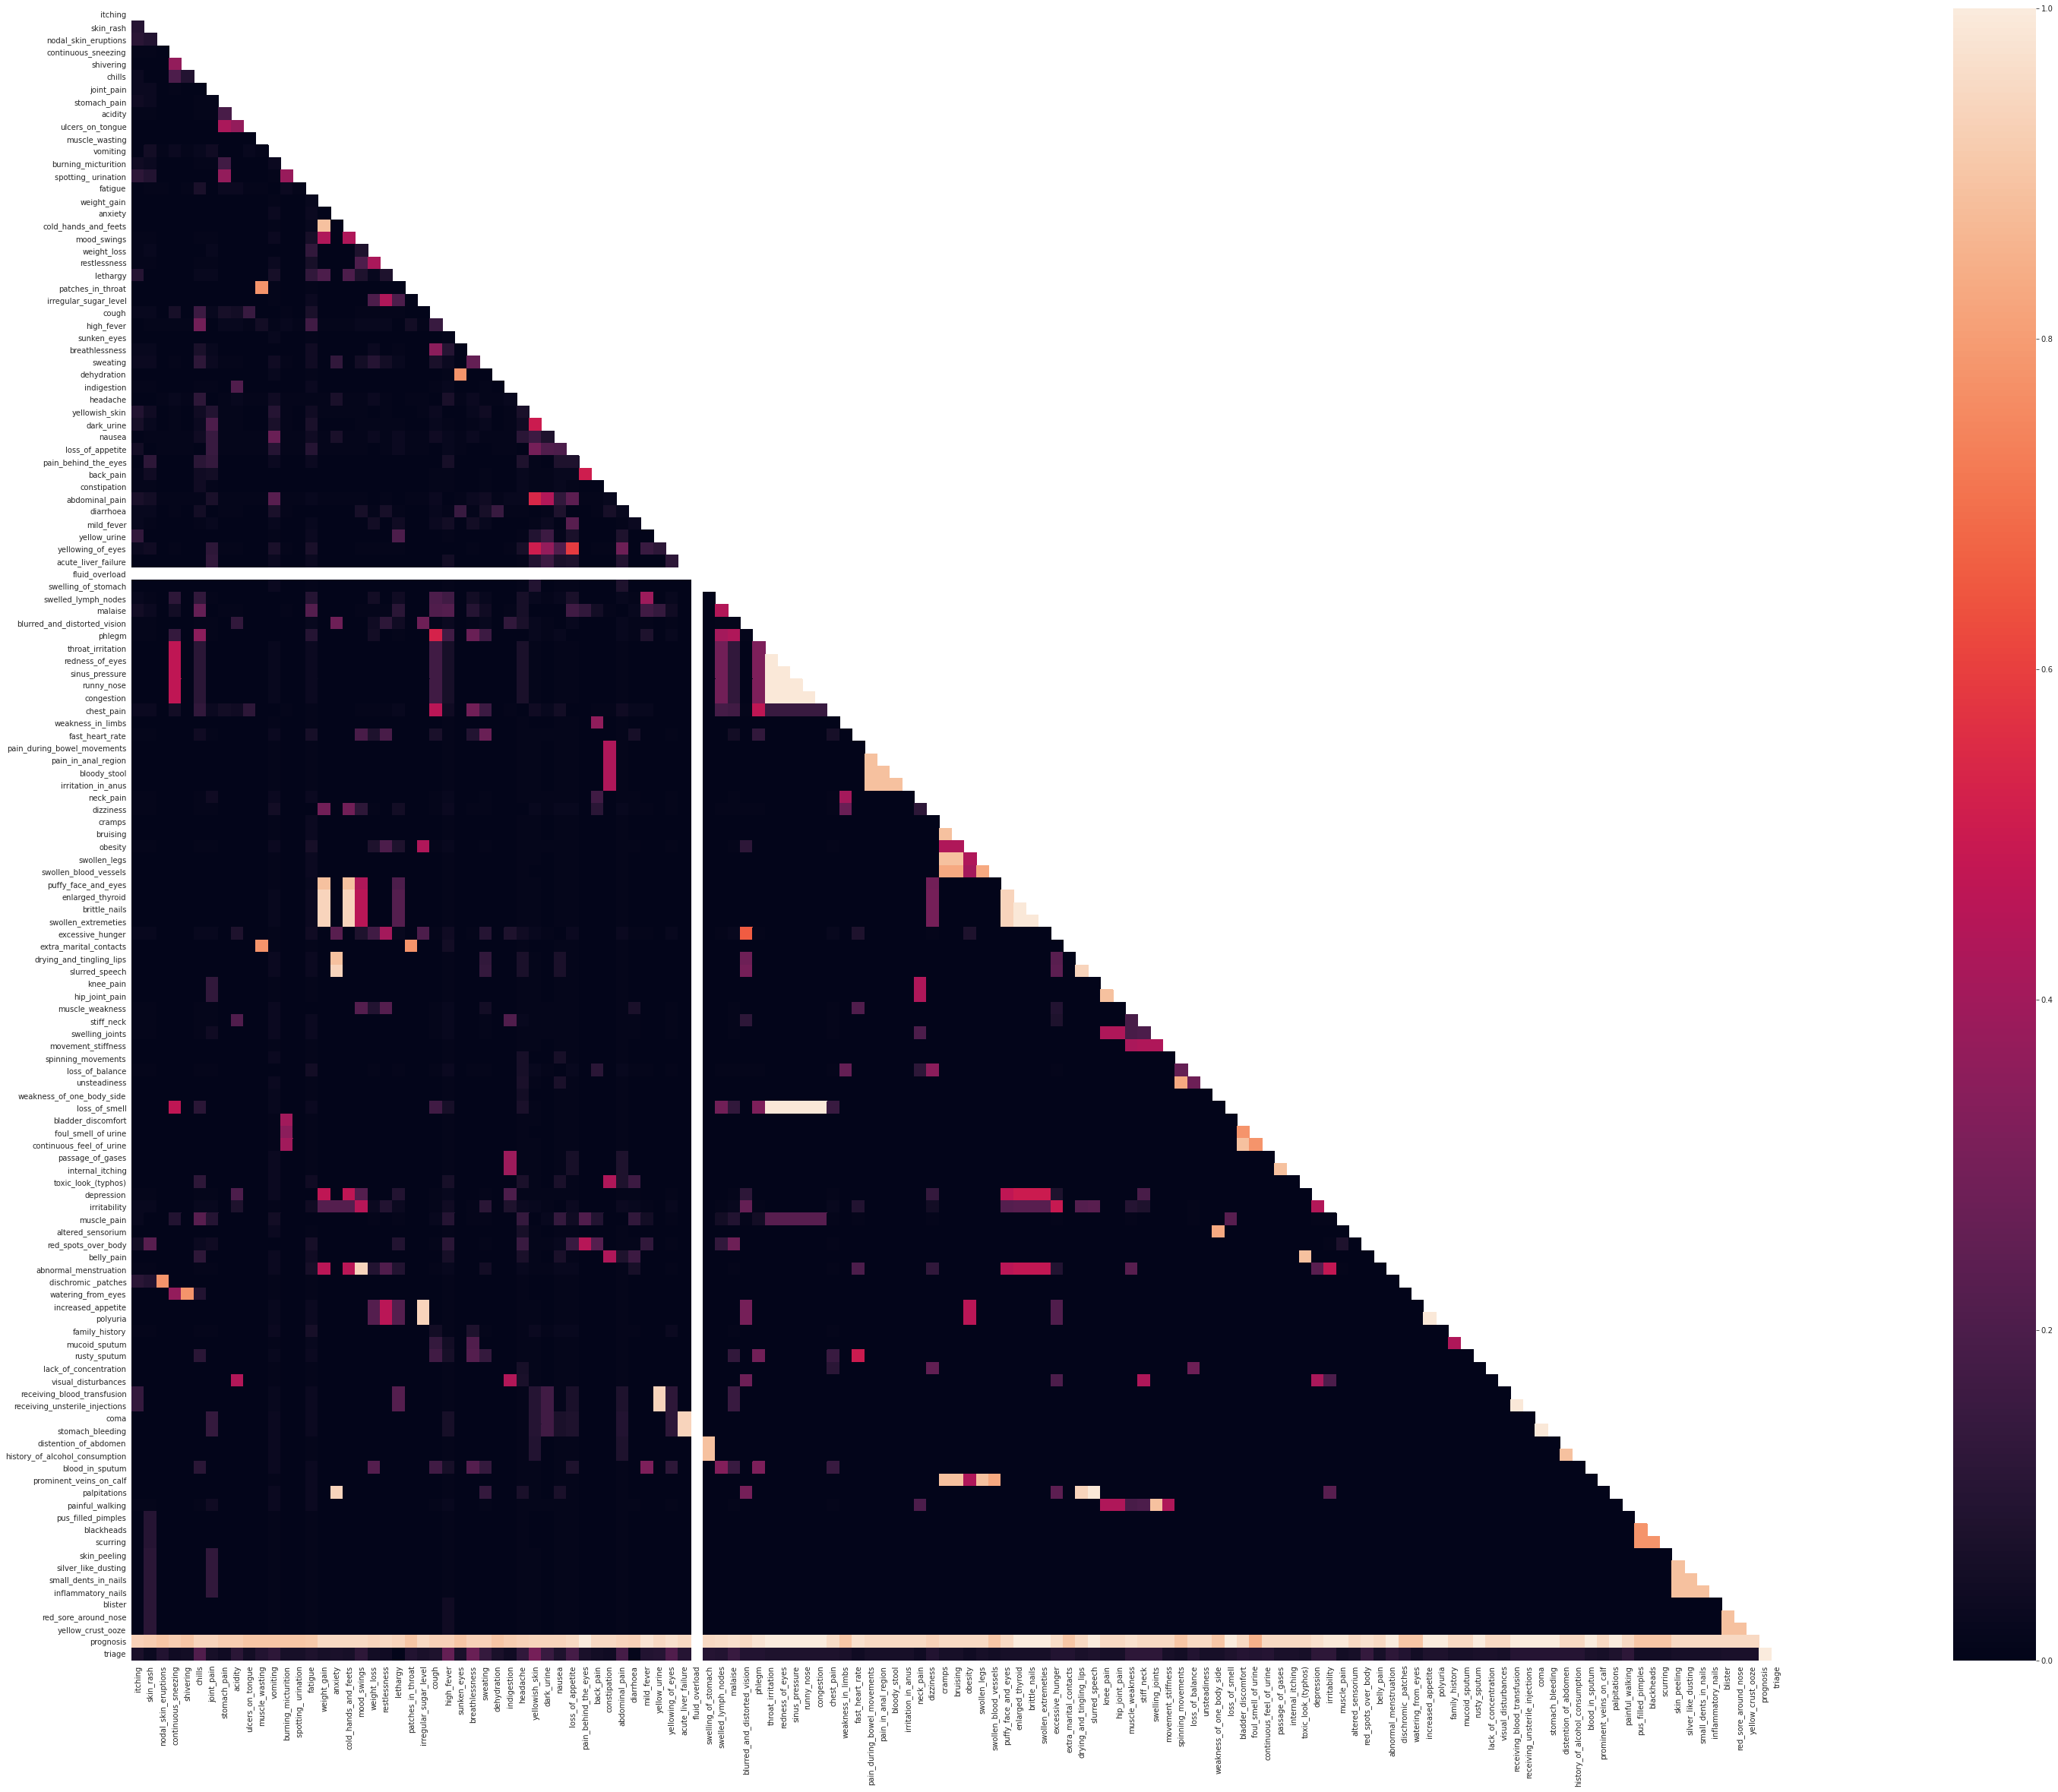

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(80,40))

mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True




with sns.axes_style("white"):
  ax = sns.heatmap(df, mask=mask,vmin=0., vmax=1, square=True)

plt.show()

In [35]:
df

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,triage
itching,1.00,0.10,0.11,0.01,0.00,0.03,0.03,0.04,0.01,0.00,0.00,0.00,0.04,0.12,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.10,0.00,0.00,0.02,0.00,0.00,0.02,0.03,0.00,0.01,0.00,0.09,0.06,0.00,0.05,0.00,0.01,0.01,0.07,0.02,0.02,0.13,0.03,0.00,NaN,0.00,0.02,0.05,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.02,0.02,0.00,0.05,0.00,0.01,0.11,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.14,0.14,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.93,0.07
skin_rash,0.10,1.00,0.09,0.01,0.00,0.00,0.03,0.03,0.01,0.00,0.00,0.05,0.03,0.09,0.01,0.00,0.00,0.00,0.01,0.02,0.01,0.00,0.00,0.00,0.02,0.01,0.00,0.02,0.03,0.00,0.01,0.00,0.04,0.02,0.01,0.00,0.12,0.04,0.01,0.05,0.02,0.01,0.00,0.04,0.00,NaN,0.00,0.01,0.03,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.02,0.00,0.00,0.23,0.00,0.01,0.09,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.10,0.10,0.10,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.92,0.03
nodal_skin_eruptions,0.11,0.09,0.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.78,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.

In [36]:
disease = disease.drop(['weight_gain','anxiety','cold_hands_and_feets','yellow_urine','acute_liver_failure',
                        'loss_of_smell','fluid_overload','swelling_of_stomach','redness_of_eyes','sinus_pressure',
                       'runny_nose','congestion','prominent_veins_on_calf','brittle_nails','swollen_extremeties',
                       'high_fever','breathlessness','loss_of_appetite','yellowish_skin','vomiting','yellowing_of_eyes',
                       'itching','abdominal_pain','chills','sweating','headache','dark_urine','nausea','weight_loss',
                       'dizziness','muscle_pain','malaise','joint_pain','mild_fever','red_spots_over_body','palpitations',
                       'irregular_sugar_level','abnormal_menstruation','swelling_joints','coma','increased_appetite',
                        'enlarged_thyroid','receiving_blood_transfusion','receiving_unsterile_injections','skin_peeling',
                       'blister','pain_in_anal_region','drying_and_tingling_lips','toxic_look_(typhos)','excessive_hunger',
                       'cramps','bruising','irritation_in_anus','bloody_stool','swollen_blood_vessels','spinning_movements',
                       'movement_stiffness','yellow_crust_ooze','distention_of_abdomen','small_dents_in_nails','scurring',
                        'visual_disturbances','extra_marital_contacts','inflammatory_nails','hip_joint_pain','altered_sensorium',
                       'continuous_feel_of_urine','internal_itching','dischromic _patches','shivering','muscle_wasting',
                       'blackheads','sunken_eyes','bladder_discomfort','cough','phlegm','swelled_lymph_nodes','ulcers_on_tongue',
                       'acidity','painful_walking','obesity','constipation', 'throat_irritation','back_pain','mood_swings',
                        'restlessness','fast_heart_rate','depression','rusty_sputum','neck_pain','spotting_ urination',
                       'mucoid_sputum','watering_from_eyes','passage_of_gases'],axis = 1)

In [37]:
rows= []

for var1 in disease:
  col = []
  for var2 in disease :
    cramers =cramers_V(disease[var1], disease[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = disease.columns, index =disease.columns)
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

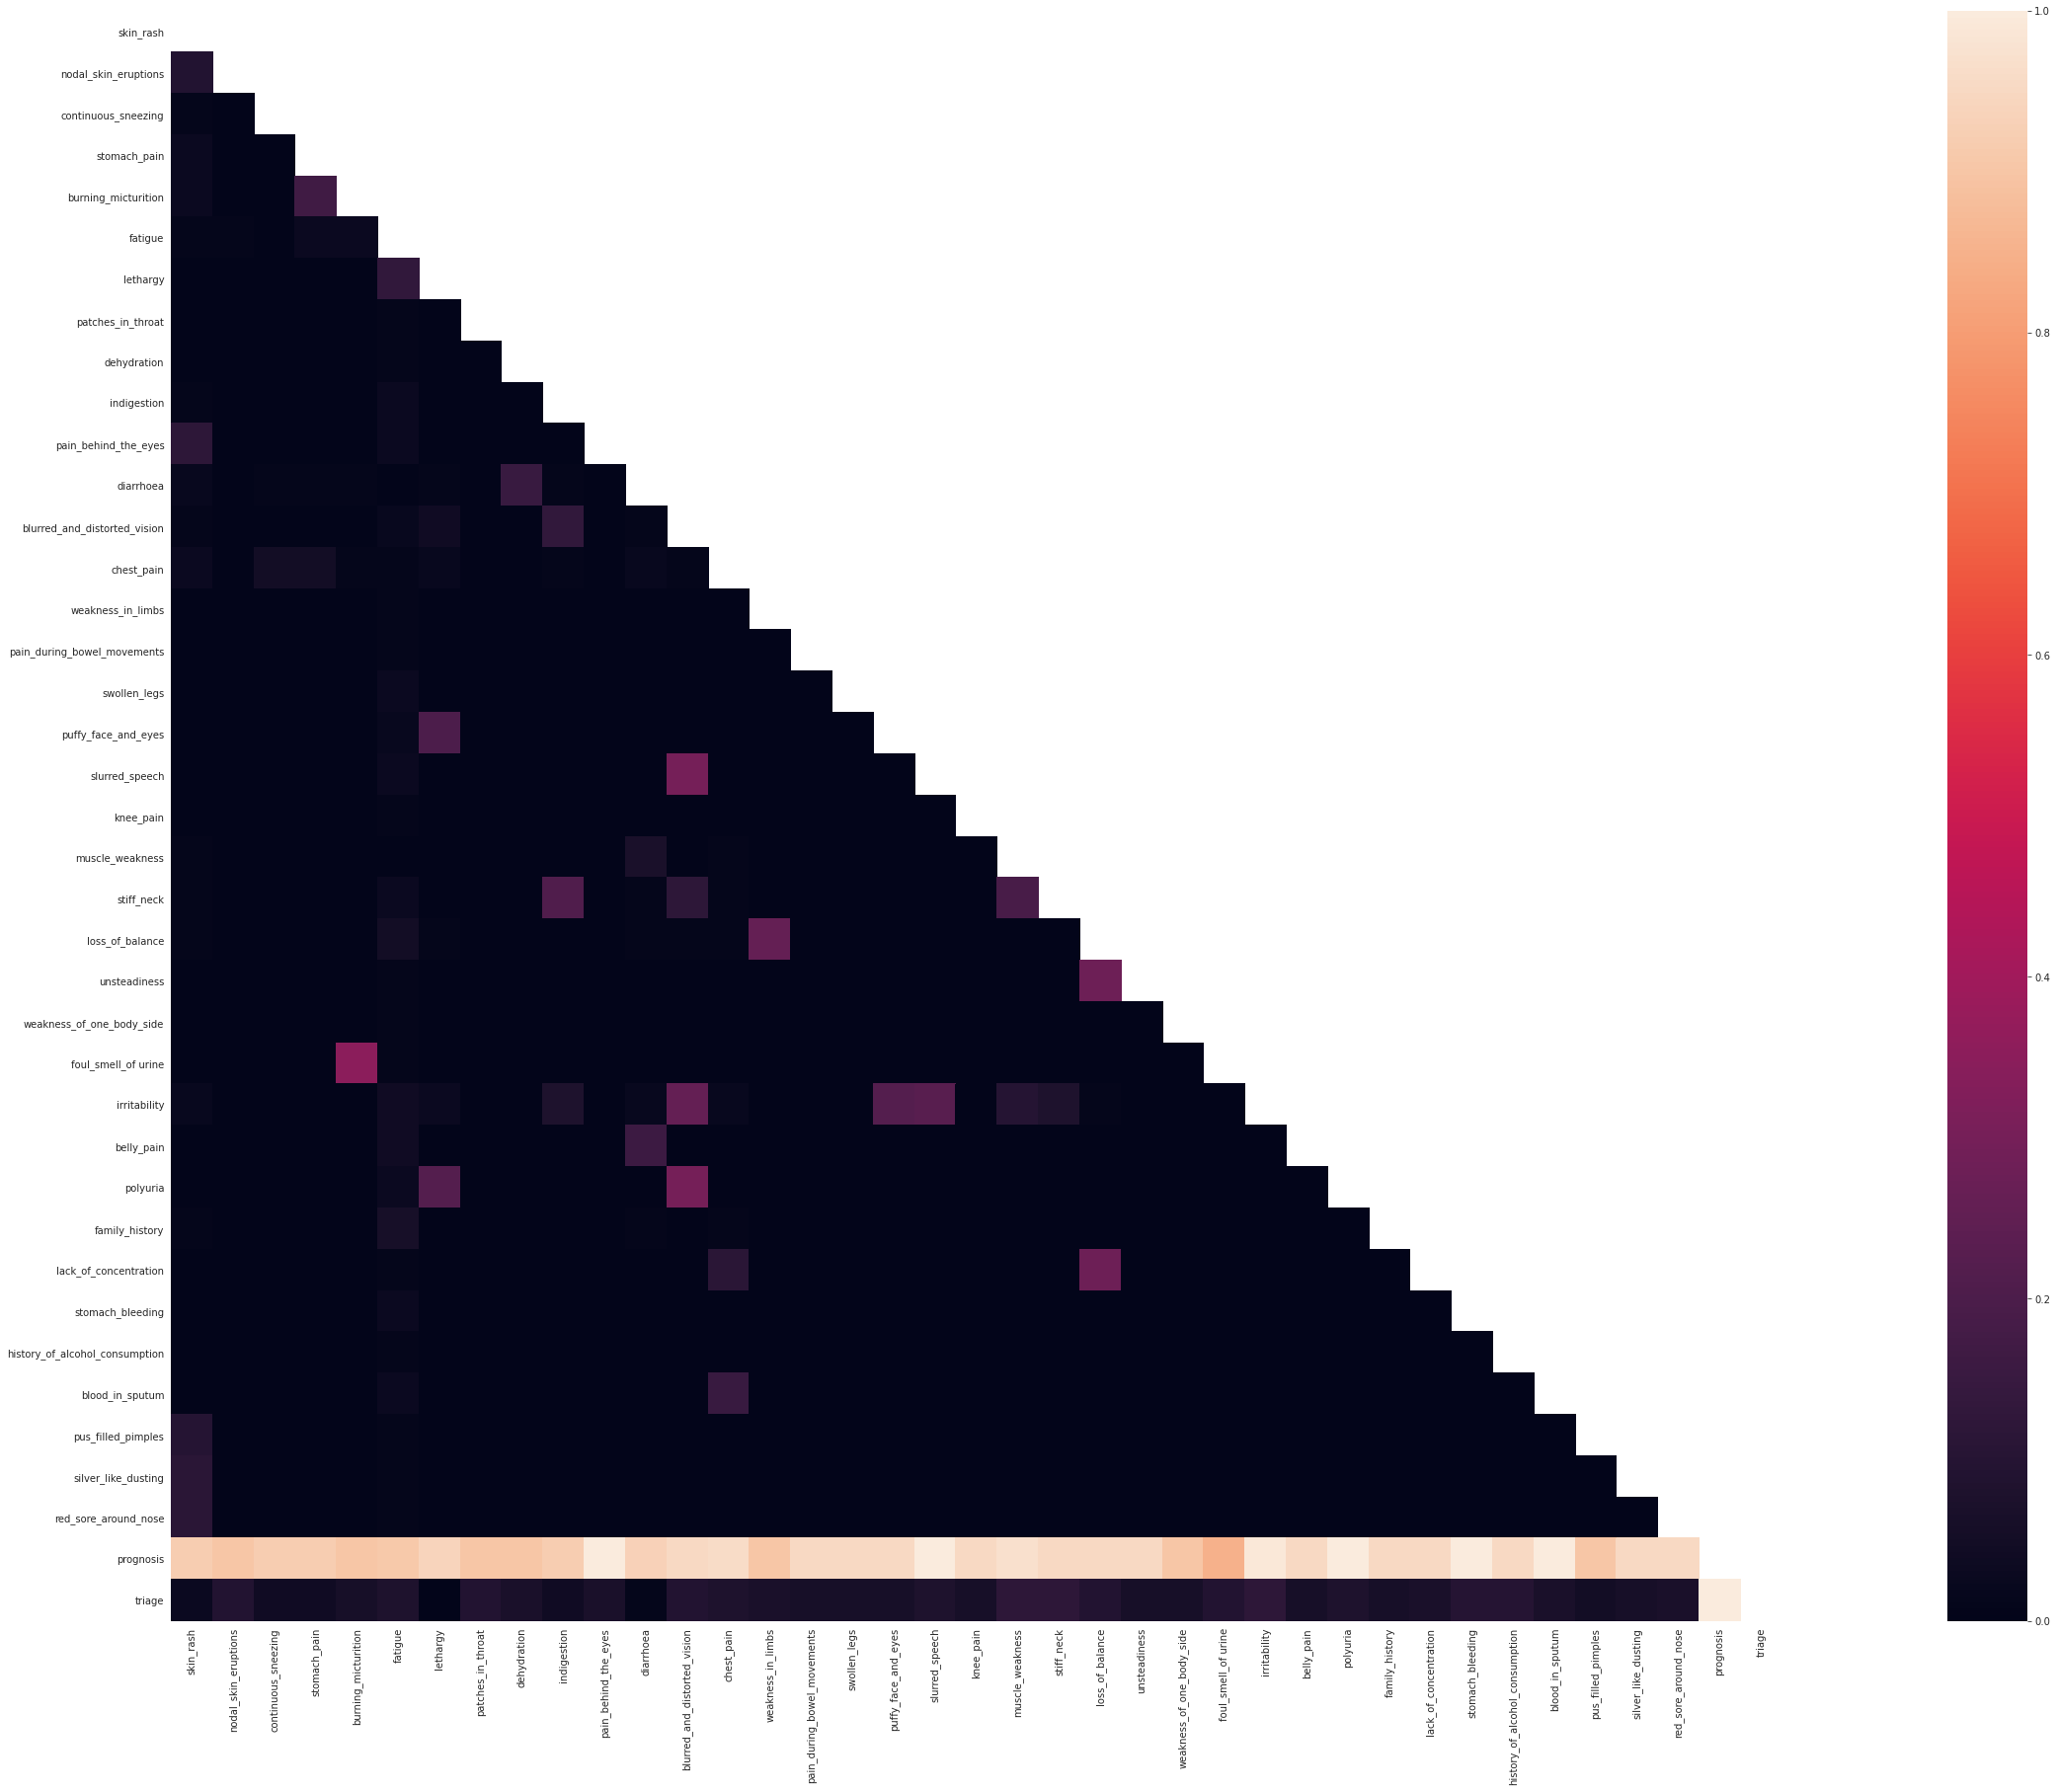

In [38]:
plt.figure(figsize=(60,30))

mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True




with sns.axes_style("white"):
  ax = sns.heatmap(df, mask=mask,vmin=0., vmax=1, square=True)

plt.show()

In [39]:
df

,skin_rash,nodal_skin_eruptions,continuous_sneezing,stomach_pain,burning_micturition,fatigue,lethargy,patches_in_throat,dehydration,indigestion,pain_behind_the_eyes,diarrhoea,blurred_and_distorted_vision,chest_pain,weakness_in_limbs,pain_during_bowel_movements,swollen_legs,puffy_face_and_eyes,slurred_speech,knee_pain,muscle_weakness,stiff_neck,loss_of_balance,unsteadiness,weakness_of_one_body_side,foul_smell_of urine,irritability,belly_pain,polyuria,family_history,lack_of_concentration,stomach_bleeding,history_of_alcohol_consumption,blood_in_sputum,pus_filled_pimples,silver_like_dusting,red_sore_around_nose,prognosis,triage
skin_rash,1.00,0.09,0.01,0.03,0.03,0.01,0.00,0.00,0.00,0.01,0.12,0.02,0.01,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,0.02,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.10,0.11,0.11,0.92,0.03
nodal_skin_eruptions,0.09,0.99,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.90,0.09
continuous_sneezing,0.01,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.92,0.04
stomach_pain,0.03,0.00,0.00,1.00,0.17,0.03,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.92,0.04
burning_micturition,0.03,0.00,0.00,0.17,1.00,0.03,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.35,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.90,0.06
fatigue,0.01,0.01,0.00,0.03,0.03,1.00,0.13,0.01,0.01,0.03,0.03,0.00,0.02,0.01,0.01,0.01,0.03,0.02,0.03,0.01,0.00,0.03,0.05,0.01,0.01,0.01,0.04,0.04,0.03,0.06,0.01,0.03,0.01,0.03,0.01,0.01,0.01,0.91,0.08
lethargy,0.00,0.00,0.00,0.00,0.00,0.13,1.00,0.00,0.00,0.00,0.00,0.01,0.04,0.02,0.00,0.00,0.00,0.20,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.03,0.00,0.22,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.94,0.00
patches_in_throat,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.90,0.09
dehydration,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.99,0.00,0.00,0.15,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.90,0.07
indigestion,0.01,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,1.00,0.00,0.01,0.13,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.21,0.00,0.00,0.00,0.00,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.92,0.04


In [40]:
#Split data for random forests
X = disease.iloc[:,0:37].values
y = disease.iloc[:,38].values
print('The independent features set: ')
print(X)
print('The dependent variable: ')
print(y)

The independent features set: 
[[1 1 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 1 0]
 [1 0 0 ... 0 0 1]]
The dependent variable: 
[2 2 2 ... 2 3 4]


In [41]:
#split data intro train, test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 42)

In [42]:
#Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [44]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
print(pd.crosstab(y_test, y_pred, rownames=['Acutal Triage'], colnames=['Predicted Triage']))

Predicted Triage    1    2    3    4
Acutal Triage                       
1                 544   54    0   79
2                  64  408    8   27
3                   3    0  670   13
4                   5    0    3  582


In [45]:
predicted_train = classifier.predict(X_train)
accuracy_score(y_train, predicted_train)

0.9016260162601626

In [46]:
predicted_test = classifier.predict(X_test)
accuracy_score(y_test, predicted_test)

0.8959349593495934

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.88      0.80      0.84       677
           2       0.88      0.80      0.84       507
           3       0.98      0.98      0.98       686
           4       0.83      0.99      0.90       590

    accuracy                           0.90      2460
   macro avg       0.90      0.89      0.89      2460
weighted avg       0.90      0.90      0.89      2460



In [48]:
features = list(zip(disease.columns[0:130], classifier.feature_importances_))

features.sort(key=lambda x:x[1])

zero_impact_features = []
lame_features = []
contributing_features = []
for i in features:
    print(i)
    if i[1] == 0.0:
        zero_impact_features.append(i)
    else:
        contributing_features.append(i)

('puffy_face_and_eyes', 0.001700213530109419)
('blood_in_sputum', 0.007853353927703482)
('polyuria', 0.00820572414794135)
('lack_of_concentration', 0.009723838708782179)
('foul_smell_of urine', 0.010513391303320777)
('pain_behind_the_eyes', 0.010702030723060052)
('belly_pain', 0.011551081479075565)
('slurred_speech', 0.011620475863153517)
('weakness_in_limbs', 0.01699170737265723)
('pus_filled_pimples', 0.01803817637725847)
('unsteadiness', 0.020970507979760956)
('silver_like_dusting', 0.021153953803069454)
('pain_during_bowel_movements', 0.02271305331667125)
('dehydration', 0.024694885651971494)
('lethargy', 0.024915383609960602)
('stiff_neck', 0.026538318794916294)
('muscle_weakness', 0.026589310538396565)
('family_history', 0.02659142225591707)
('indigestion', 0.027146957683823796)
('weakness_of_one_body_side', 0.027548536193414498)
('knee_pain', 0.02778065372521239)
('history_of_alcohol_consumption', 0.028096479689739225)
('burning_micturition', 0.02900102062335158)
('red_sore_arou